In [1]:
from __future__ import division, absolute_import

import os
import sys
import random

#os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"   # see issue #152
#os.environ["CUDA_VISIBLE_DEVICES"] = ""

import h5py
import pickle
import numpy as np
import keras
import pandas as pd
import random

from glob import glob
from keras.models import load_model
from keras import models
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import datetime
from plotnine import *

#root
absPath = '/home/angela/padding_EBI/'
sys.path.insert(0, absPath)

from src.Target import Target
from src.processing_activations import *

#para no imprimir warnings chungos
import warnings 
warnings.simplefilter("ignore")

np.random.seed(1)
random.seed(1)
%matplotlib inline

Using TensorFlow backend.


In [2]:
list_paddings = ['ext_padding', 'mid_padding', 'post_padding', 'pre_padding', 
                 'rnd_padding', 'strf_padding',  "zoom_padding"]

nfolds = 10
nshape = (1, 1000, 26)
nlayer = 2

# 1_conv 

In [3]:
folder = 'EC_number/archaea/1conv/64filts_size5/'

# Task 1

In [4]:
#coger al azar 7 enzimas y 7 no enzimas para comparar
prots_pca_task1 = []
list_indices_enzymes_task1 = []
for enz_label in [0,1]:
    indices_enzymes_task1 = find_prot_labeled(folder, enz_label, 7, "task1", "labels_task1")
    print(indices_enzymes_task1, enz_label)
    list_indices_enzymes_task1.append((indices_enzymes_task1, enz_label))
    for idx,i in enumerate(indices_enzymes_task1):
        for padding in list_paddings:
            seq = load_prot_labeled(folder, padding, nshape, enz_label, i)
            prots_pca_task1.append((seq, enz_label, padding))
            #print(enz_label, "prot", idx)

[15066, 12675, 2534, 13134, 18931, 454, 3706] 0
[6586, 10257, 6480, 11790, 11511, 16316, 9507] 1


In [4]:
task = 'task1/'

In [ ]:
#Define list of dataframes
#lista_dfs = []
#contador = 0
#for tup in prots_pca_task1:
#    model_type = tup[2]
#    enz_type = tup[1]
#    prot = tup[0]
#    for fold in range(0,5):#range(nfolds):
#        contador = contador + 1
        #print("Model type: ", model_type, "enzyme type", enz_type)
#        model = search_model(folder, str(fold), task, model_type)
        #writing log file 
#        log_file = ''.join(string for string in [absPath, 'data/results/', folder, task, 'log_file_pca.txt' ])
#        f = open(log_file, 'a+')
#        print('Iteracion número %s' % contador, file=f)
#        print('Model type: %s \n' % model_type, file=f)
#        print('Enzyme type: %s \n' % enz_type, file=f)
#        formatted_time = datetime.datetime.now()
#        print('Starting time: %s \n' % formatted_time, file=f)
#        activations = obtain_activations(model, nlayer, prot)
#        act_df = activations_to_df(activations, model_type, fold)
#        act_df["enzyme_type"] = tup[1]
#        formatted_endtime = datetime.datetime.now()
#        print('Finishing time: %s \n' % formatted_endtime, file=f)
#        lista_dfs.append(act_df)
#        f.close()

In [4]:
# ha tardado un huevo en ejecutarse asi que deberia guardarlo
filename = "activations_enzymeType_pt1.pickle"
pickle_path = "".join((absPath, "data/results/", folder, task, filename))
#with open(pickle_path, 'wb') as handle:
#    pickle.dump(lista_dfs, handle, protocol=pickle.HIGHEST_PROTOCOL)

#loading it
with open(pickle_path, 'rb') as handle:
    lista_dfs_1_task1 = pickle.load(handle)

In [ ]:
#Define list of dataframes
#lista_dfs = []
#contador = 0
#for tup in prots_pca_task1:
#    model_type = tup[2]
#    enz_type = tup[1]
#    prot = tup[0]
#    for fold in range(5,10):#range(nfolds):
#        contador = contador + 1
        #print("Model type: ", model_type, "enzyme type", enz_type)
#        model = search_model(folder, str(fold), task, model_type)
        #writing log file 
#        log_file = ''.join(string for string in [absPath, 'data/results/', folder, task, 'log_file_pca.txt' ])
#        f = open(log_file, 'a+')
#        print('Iteracion número %s' % contador, file=f)
#        print('Model type: %s \n' % model_type, file=f)
#        print('Enzyme type: %s \n' % enz_type, file=f)
#        formatted_time = datetime.datetime.now()
#        print('Starting time: %s \n' % formatted_time, file=f)
#        activations = obtain_activations(model, nlayer, prot)
#        act_df = activations_to_df(activations, model_type, fold)
#        act_df["enzyme_type"] = tup[1]
#        formatted_endtime = datetime.datetime.now()
#        print('Finishing time: %s \n' % formatted_endtime, file=f)
#        lista_dfs.append(act_df)
#        f.close()

In [5]:
# ha tardado un huevo en ejecutarse asi que deberia guardarlo
filename = "activations_enzymeType_pt2.pickle"
pickle_path = "".join((absPath, "data/results/", folder, task, filename))
#with open(pickle_path, 'wb') as handle:
#    pickle.dump(lista_dfs, handle, protocol=pickle.HIGHEST_PROTOCOL)

#loading it
with open(pickle_path, 'rb') as handle:
    lista_dfs_2_task1 = pickle.load(handle)

In [ ]:
#deberia cargar esto, juntarlo, comprobar que no son iguales y dibujar los plots

In [9]:
lista_dfs_task1 = lista_dfs_1_task1 + lista_dfs_2_task1

In [11]:
final_df_task1, pca_task1 = train_pca(lista_dfs_task1, 2)

In [12]:
final_df_task1.shape

(62720, 6)

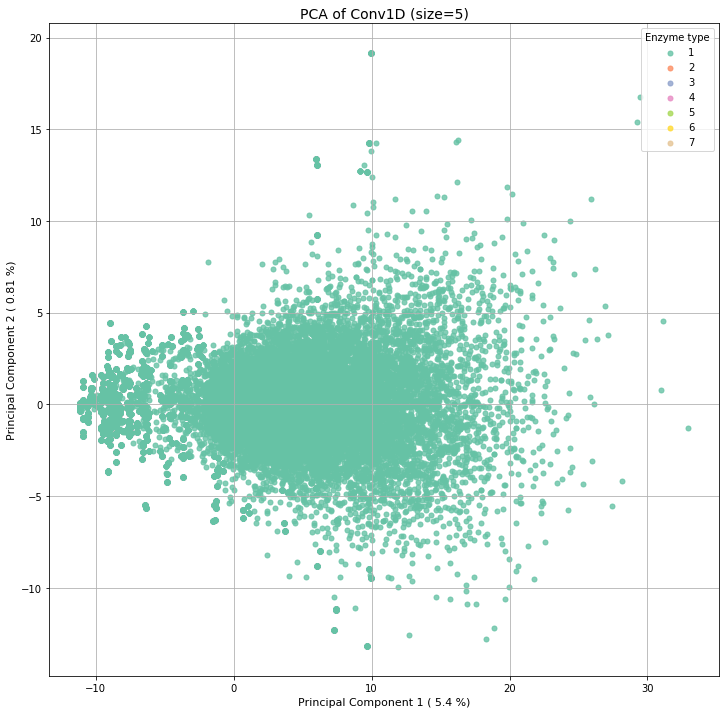

In [13]:
plot_pca(final_df_task1, pca_task1, "enzyme_type")
saving_activations_plot("plt", "2protsPerType_enzType", folder, task, p=None)

ext_padding (8960,)
mid_padding (8960,)
post_padding (8960,)
pre_padding (8960,)
rnd_padding (8960,)
strf_padding (8960,)
zoom_padding (8960,)


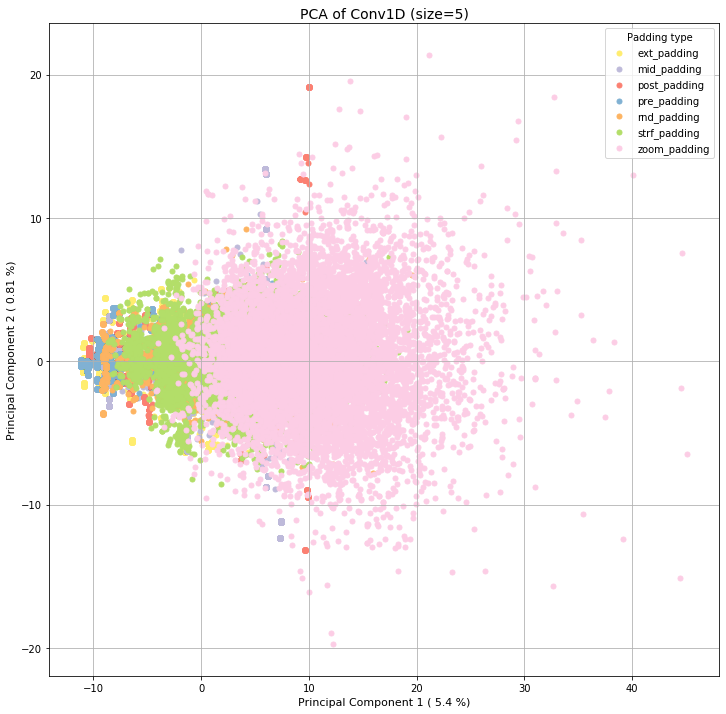

In [16]:
plot_pca(final_df_task1, pca_task1, "padding", list_paddings)
saving_activations_plot("plt", "2protsPerType_padding", folder, task, p=None)

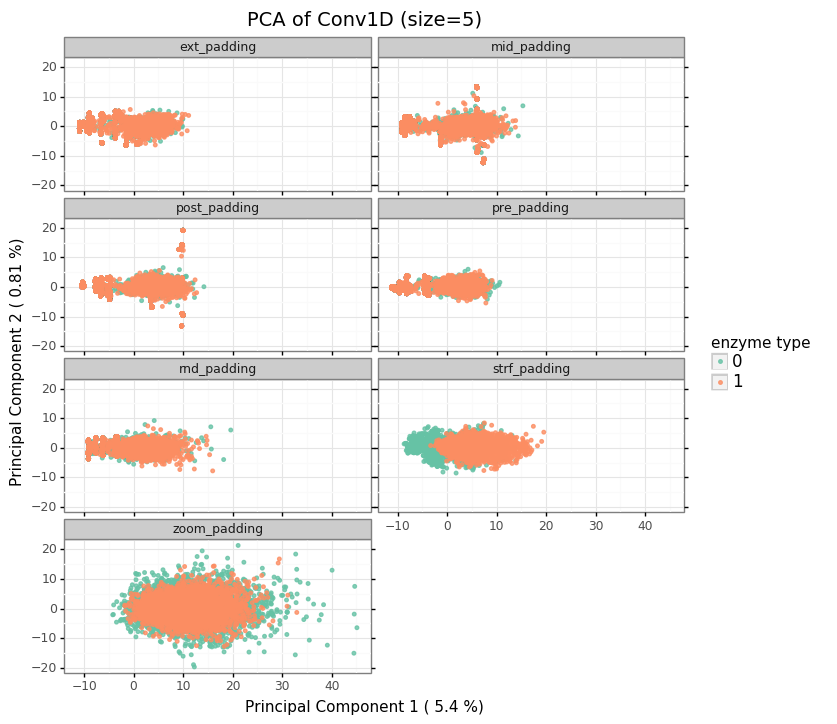

<ggplot: (-9223363290661364399)>

In [17]:
p = plot_pca_per_padding(final_df_task1, pca_task1)
saving_activations_plot("ggplot", "2protsPerType_facetPerPadding", folder, task, p=p)
p

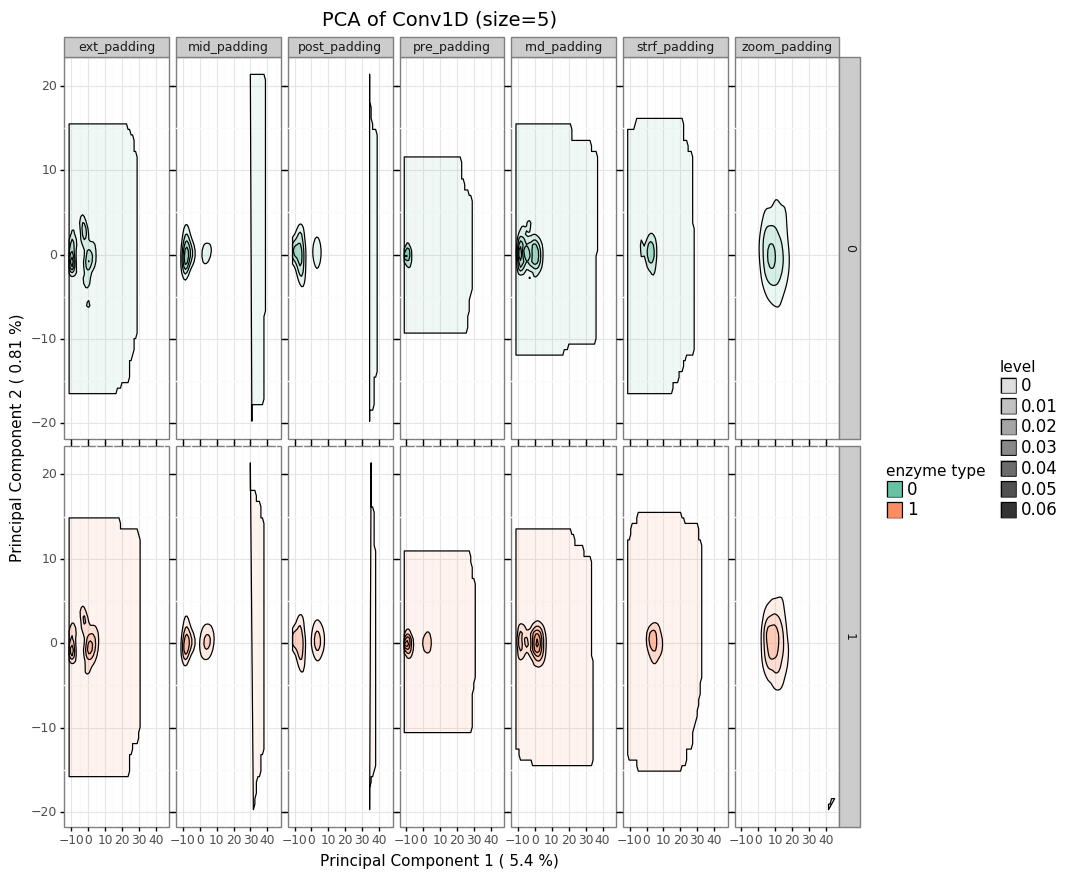

<ggplot: (8746184321102)>

In [18]:
q = density_facet(final_df_task1, pca_task1)
saving_activations_plot("ggplot", "2protsPerType_densityFacet", folder, task, p=q)
q

In [7]:
# save into a CSV

filename = "activations_enzymeType_pt1.pickle"
pickle_path = "".join((absPath, "data/results/", folder, task, filename))
#loading it
with open(pickle_path, 'rb') as handle:
    lista_dfs_1_task1 = pickle.load(handle)
    
filename = "activations_enzymeType_pt2.pickle"
pickle_path = "".join((absPath, "data/results/", folder, task, filename))

#loading it
with open(pickle_path, 'rb') as handle:
    lista_dfs_2_task1 = pickle.load(handle)
    
lista_dfs_task1 = lista_dfs_1_task1 + lista_dfs_2_task1
final_df_task1, pca_task1 = train_pca(lista_dfs_task1, 2)

final_df_task1.head()

# guardamos final_df en un csv
task = "task1/"
filename = "pca_results.csv"
pickle_path = "".join((absPath, "data/results/", folder, task, filename))

final_df_task1.to_csv(pickle_path)

## Task 2

In [8]:
task = 'task2/'

In [7]:
prots_pca_task2 = []
list_indices_enzymes = []
for enz_label in range(1,8):
    indices_enzymes = find_prot_labeled(folder, enz_label)
    print(indices_enzymes, enz_label)
    list_indices_enzymes.append((indices_enzymes, enz_label))
    for idx,i in enumerate(indices_enzymes):
        for padding in list_paddings:
            seq = load_prot_labeled(folder, padding, nshape, enz_label, i)
            prots_pca_task2.append((seq,enz_label, padding))

[10911, 17828] 1
[10937, 8389] 2
[7511, 10826] 3
[10809, 5232] 4
[6482, 6602] 5
[8546, 16129] 6
[11613, 16508] 7


In [ ]:
#Define list of dataframes
#lista_dfs = []
#contador = 0
#for tup in prots_pca_task2:
#    model_type = tup[2]
#    enz_type = tup[1]
#    prot = tup[0]
#    for fold in range(0,5):#range(nfolds):
#        contador = contador + 1
        #print("Model type: ", model_type, "enzyme type", enz_type)
#        model = search_model(folder, str(fold), task, model_type)
        #writing log file 
#        log_file = ''.join(string for string in [absPath, 'data/results/', folder, task, 'log_file_pca.txt' ])
#        f = open(log_file, 'a+')
#        print('Iteracion número %s' % contador, file=f)
#        print('Model type: %s \n' % model_type, file=f)
#        print('Enzyme type: %s \n' % enz_type, file=f)
#        formatted_time = datetime.datetime.now()
#        print('Starting time: %s \n' % formatted_time, file=f)
#        activations = obtain_activations(model, nlayer, prot)
#        act_df = activations_to_df(activations, model_type, fold)
#        act_df["enzyme_type"] = tup[1]
#        formatted_endtime = datetime.datetime.now()
#        print('Finishing time: %s \n' % formatted_endtime, file=f)
#        lista_dfs.append(act_df)
#        f.close()

In [22]:
# ha tardado un huevo en ejecutarse asi que deberia guardarlo
filename = "activations_enzymeType_pt1.pickle"
pickle_path = "".join((absPath, "data/results/", folder, task, filename))
#with open(pickle_path, 'wb') as handle:
#    pickle.dump(lista_dfs, handle, protocol=pickle.HIGHEST_PROTOCOL)

#loading it
with open(pickle_path, 'rb') as handle:
    lista_dfs_task2_1 = pickle.load(handle)

In [23]:
len(lista_dfs_task2_1)

490

In [ ]:
#Define list of dataframes
#lista_dfs = []
#contador = 0
#for tup in prots_pca_task2:
#    model_type = tup[2]
#    enz_type = tup[1]
#    prot = tup[0]
#    for fold in range(5,10):#range(nfolds):
#        contador = contador + 1
        #print("Model type: ", model_type, "enzyme type", enz_type)
#        model = search_model(folder, str(fold), task, model_type)
        #writing log file 
#        log_file = ''.join(string for string in [absPath, 'data/results/', folder, task, 'log_file_pca.txt' ])
#        f = open(log_file, 'a+')
#        print('Iteracion número %s' % contador, file=f)
#        print('Model type: %s \n' % model_type, file=f)
#        print('Enzyme type: %s \n' % enz_type, file=f)
#        formatted_time = datetime.datetime.now()
#        print('Starting time: %s \n' % formatted_time, file=f)
#        activations = obtain_activations(model, nlayer, prot)
#        act_df = activations_to_df(activations, model_type, fold)
#        act_df["enzyme_type"] = tup[1]
#        formatted_endtime = datetime.datetime.now()
#        print('Finishing time: %s \n' % formatted_endtime, file=f)
#        lista_dfs.append(act_df)
#        f.close()

In [24]:
# ha tardado un huevo en ejecutarse asi que deberia guardarlo
filename = "activations_enzymeType_pt2.pickle"
pickle_path = "".join((absPath, "data/results/", folder, task, filename))
#with open(pickle_path, 'wb') as handle:
#    pickle.dump(lista_dfs, handle, protocol=pickle.HIGHEST_PROTOCOL)

#loading it
with open(pickle_path, 'rb') as handle:
    lista_dfs_task2_2 = pickle.load(handle)

In [25]:
lista_dfs_task2 = lista_dfs_task2_1 + lista_dfs_task2_2

In [26]:
final_df_task2, pca_task2 = train_pca(lista_dfs_task2, 2)

In [28]:
final_df_task2.shape

(62720, 6)

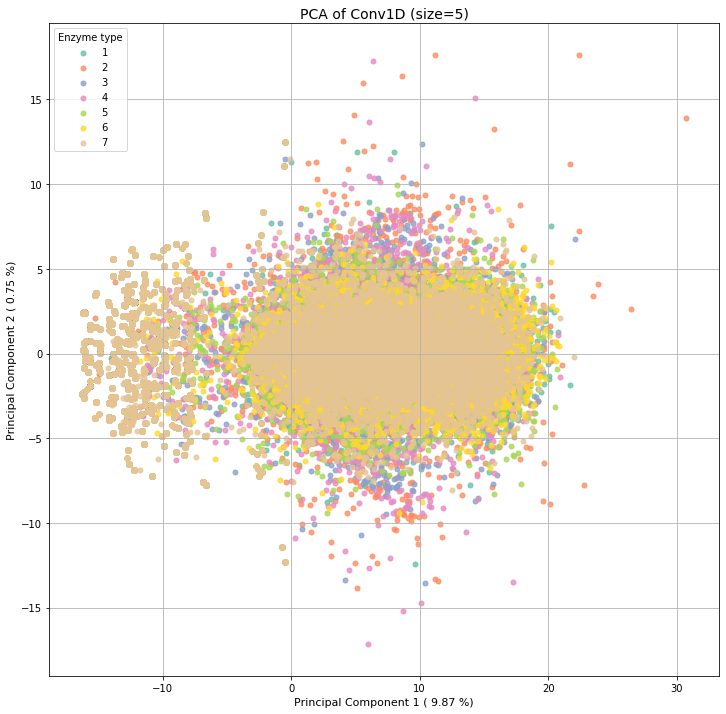

In [29]:
plot_pca(final_df_task2, pca_task2, "enzyme_type")
saving_activations_plot("plt", "2protsPerType_enzType", folder, task, p=None)

ext_padding (8960,)
mid_padding (8960,)
post_padding (8960,)
pre_padding (8960,)
rnd_padding (8960,)
strf_padding (8960,)
zoom_padding (8960,)


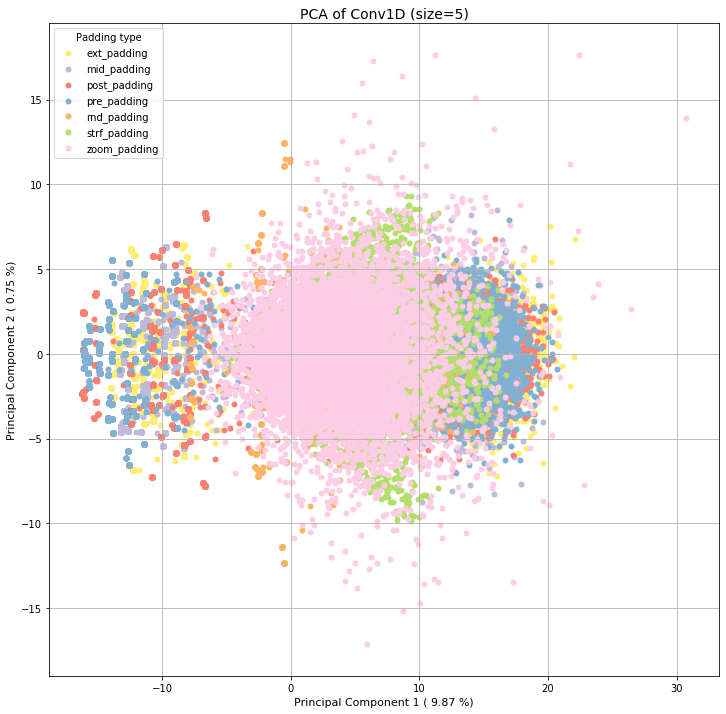

In [30]:
plot_pca(final_df_task2, pca_task2, "padding", list_paddings)
saving_activations_plot("plt", "2protsPerType_padding", folder, task, p=None)

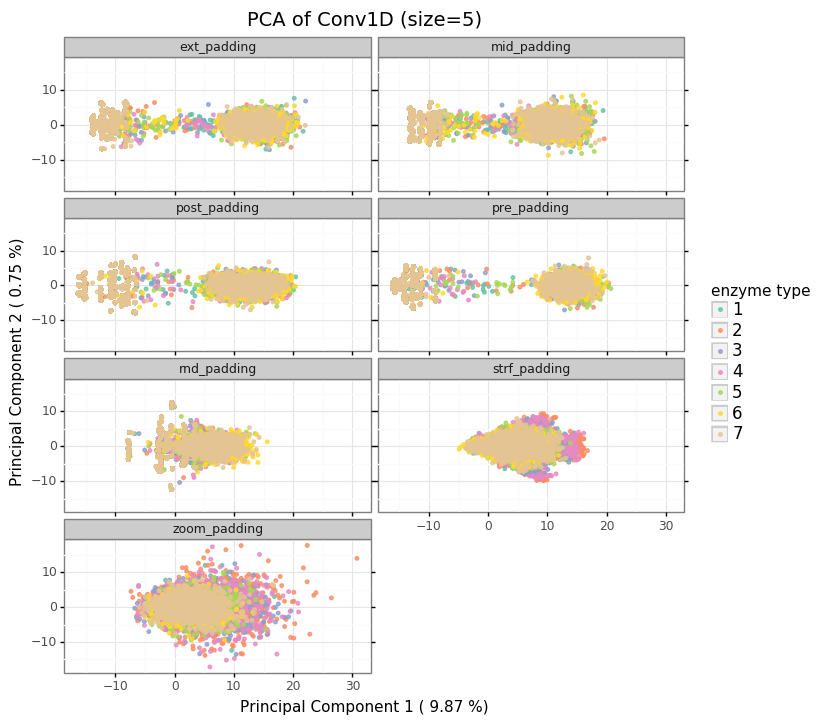

<ggplot: (-9223363290670969561)>

In [31]:
p = plot_pca_per_padding(final_df_task2, pca_task2)
saving_activations_plot("ggplot", "2protsPerType_facetPerPadding", folder, task, p=p)
p

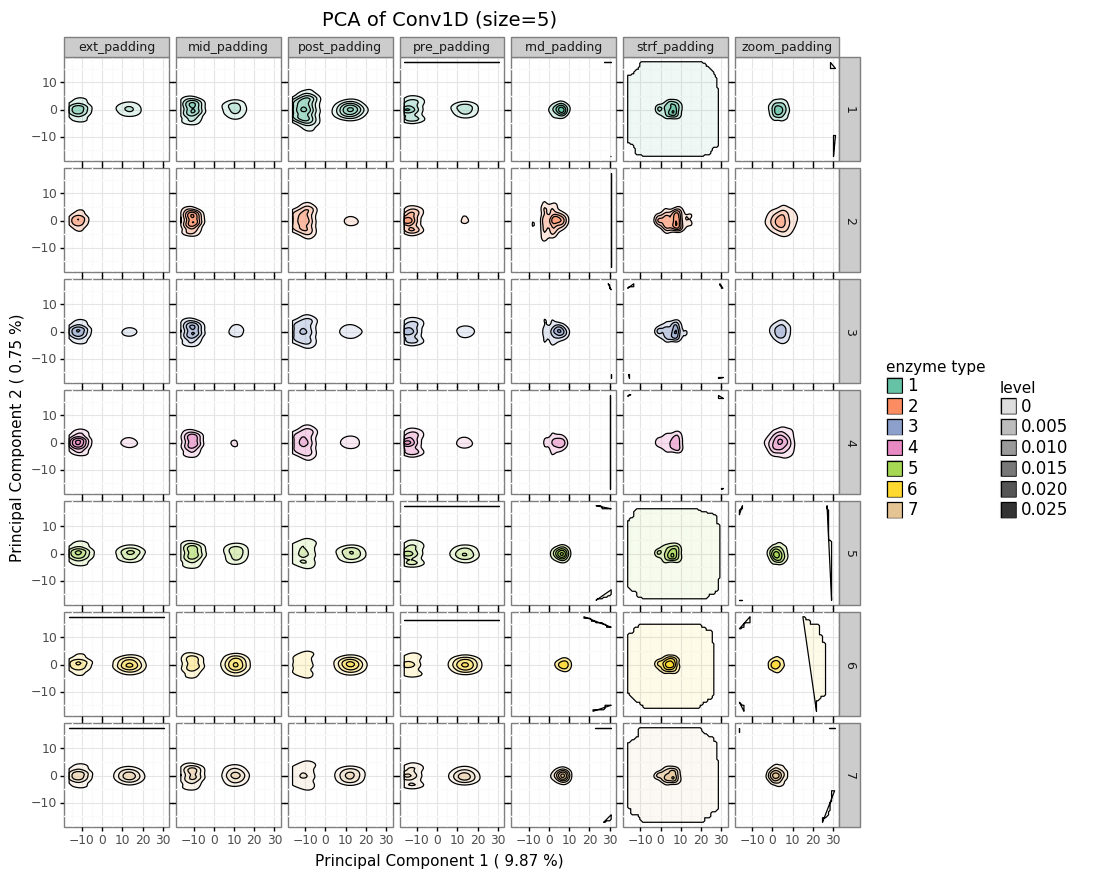

<ggplot: (8746181674511)>

In [32]:
q = density_facet(final_df_task2, pca_task2)
saving_activations_plot("ggplot", "2protsPerType_densityFacet", folder, task, p=q)
q

In [9]:
# save into a CSV

filename = "activations_enzymeType_pt1.pickle"
pickle_path = "".join((absPath, "data/results/", folder, task, filename))

#loading it
with open(pickle_path, 'rb') as handle:
    lista_dfs_task2_1 = pickle.load(handle)
    
filename = "activations_enzymeType_pt2.pickle"
pickle_path = "".join((absPath, "data/results/", folder, task, filename))

#loading it
with open(pickle_path, 'rb') as handle:
    lista_dfs_task2_2 = pickle.load(handle)
    
lista_dfs_task2 = lista_dfs_task2_1 + lista_dfs_task2_2
final_df_task2, pca_task2 = train_pca(lista_dfs_task2, 2)

final_df_task2.head()

# guardamos final_df en un csv
task = "task2/"
filename = "pca_results.csv"
pickle_path = "".join((absPath, "data/results/", folder, task, filename))

final_df_task2.to_csv(pickle_path)

# bi_lstm

In [4]:
folder = 'EC_number/archaea/rnn_conv/256rnn/'

## Task 1

In [9]:
task = 'task1/'

In [ ]:
#Define list of dataframes
lista_dfs = []
contador = 0
for tup in prots_pca_task1:
    model_type = tup[2]
    enz_type = tup[1]
    prot = tup[0]
    for fold in range(0,5):#range(nfolds):
        contador = contador + 1
        #print("Model type: ", model_type, "enzyme type", enz_type)
        model = search_model(folder, str(fold), task, model_type)
        #writing log file 
        log_file = ''.join(string for string in [absPath, 'data/results/', folder, task, 'log_file_pca.txt' ])
        f = open(log_file, 'a+')
        print('Iteracion número %s' % contador, file=f)
        print('Model type: %s \n' % model_type, file=f)
        print('Enzyme type: %s \n' % enz_type, file=f)
        formatted_time = datetime.datetime.now()
        print('Starting time: %s \n' % formatted_time, file=f)
        activations = obtain_activations(model, nlayer, prot)
        act_df = activations_to_df(activations, model_type, fold)
        act_df["enzyme_type"] = tup[1]
        formatted_endtime = datetime.datetime.now()
        print('Finishing time: %s \n' % formatted_endtime, file=f)
        lista_dfs.append(act_df)
        f.close()

In [10]:
# ha tardado un huevo en ejecutarse asi que deberia guardarlo
filename = "activations_enzymeType_pt1.pickle"
pickle_path = "".join((absPath, "data/results/", folder, task, filename))
#with open(pickle_path, 'wb') as handle:
#    pickle.dump(lista_dfs, handle, protocol=pickle.HIGHEST_PROTOCOL)

#loading it
with open(pickle_path, 'rb') as handle:
    lista_dfs_task1_1 = pickle.load(handle)

In [ ]:
#Define list of dataframes
lista_dfs = []
contador = 0
for tup in prots_pca_task1:
    model_type = tup[2]
    enz_type = tup[1]
    prot = tup[0]
    for fold in range(5,7):#10):#range(nfolds):
        contador = contador + 1
        #print("Model type: ", model_type, "enzyme type", enz_type)
        model = search_model(folder, str(fold), task, model_type)
        #writing log file 
        log_file = ''.join(string for string in [absPath, 'data/results/', folder, task, 'log_file_pca.txt' ])
        f = open(log_file, 'a+')
        print('Iteracion número %s' % contador, file=f)
        print('Model type: %s \n' % model_type, file=f)
        print('Enzyme type: %s \n' % enz_type, file=f)
        formatted_time = datetime.datetime.now()
        print('Starting time: %s \n' % formatted_time, file=f)
        activations = obtain_activations(model, nlayer, prot)
        act_df = activations_to_df(activations, model_type, fold)
        act_df["enzyme_type"] = tup[1]
        formatted_endtime = datetime.datetime.now()
        print('Finishing time: %s \n' % formatted_endtime, file=f)
        lista_dfs.append(act_df)
        f.close()
        
# ha tardado un huevo en ejecutarse asi que deberia guardarlo
filename = "activations_enzymeType_pt2.pickle"
pickle_path = "".join((absPath, "data/results/", folder, task, filename))
with open(pickle_path, 'wb') as handle:
    pickle.dump(lista_dfs, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [11]:
# ha tardado un huevo en ejecutarse asi que deberia guardarlo
filename = "activations_enzymeType_pt2.pickle"
pickle_path = "".join((absPath, "data/results/", folder, task, filename))
#with open(pickle_path, 'wb') as handle:
#    pickle.dump(lista_dfs, handle, protocol=pickle.HIGHEST_PROTOCOL)

#loading it
with open(pickle_path, 'rb') as handle:
    lista_dfs_task1_2 = pickle.load(handle)

In [ ]:
#Define list of dataframes
lista_dfs = []
contador = 0
for tup in prots_pca_task1:
    model_type = tup[2]
    enz_type = tup[1]
    prot = tup[0]
    for fold in range(7,10):#range(nfolds):
        contador = contador + 1
        #print("Model type: ", model_type, "enzyme type", enz_type)
        model = search_model(folder, str(fold), task, model_type)
        #writing log file 
        log_file = ''.join(string for string in [absPath, 'data/results/', folder, task, 'log_file_pca.txt' ])
        f = open(log_file, 'a+')
        print('Iteracion número %s' % contador, file=f)
        print('Model type: %s \n' % model_type, file=f)
        print('Enzyme type: %s \n' % enz_type, file=f)
        formatted_time = datetime.datetime.now()
        print('Starting time: %s \n' % formatted_time, file=f)
        activations = obtain_activations(model, nlayer, prot)
        act_df = activations_to_df(activations, model_type, fold)
        act_df["enzyme_type"] = tup[1]
        formatted_endtime = datetime.datetime.now()
        print('Finishing time: %s \n' % formatted_endtime, file=f)
        lista_dfs.append(act_df)
        f.close()
        
# ha tardado un huevo en ejecutarse asi que deberia guardarlo
filename = "activations_enzymeType_pt3.pickle"
pickle_path = "".join((absPath, "data/results/", folder, task, filename))
with open(pickle_path, 'wb') as handle:
    pickle.dump(lista_dfs, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [12]:
# ha tardado un huevo en ejecutarse asi que deberia guardarlo
filename = "activations_enzymeType_pt3.pickle"
pickle_path = "".join((absPath, "data/results/", folder, task, filename))
#with open(pickle_path, 'wb') as handle:
#    pickle.dump(lista_dfs, handle, protocol=pickle.HIGHEST_PROTOCOL)

#loading it
with open(pickle_path, 'rb') as handle:
    lista_dfs_task1_3 = pickle.load(handle)

In [13]:
lista_dfs_task1 = lista_dfs_task1_1 + lista_dfs_task1_2 + lista_dfs_task1_3

In [17]:
len(lista_dfs_task1)

980

In [14]:
final_df_task1, pca_task1 = train_pca(lista_dfs_task1, 2)

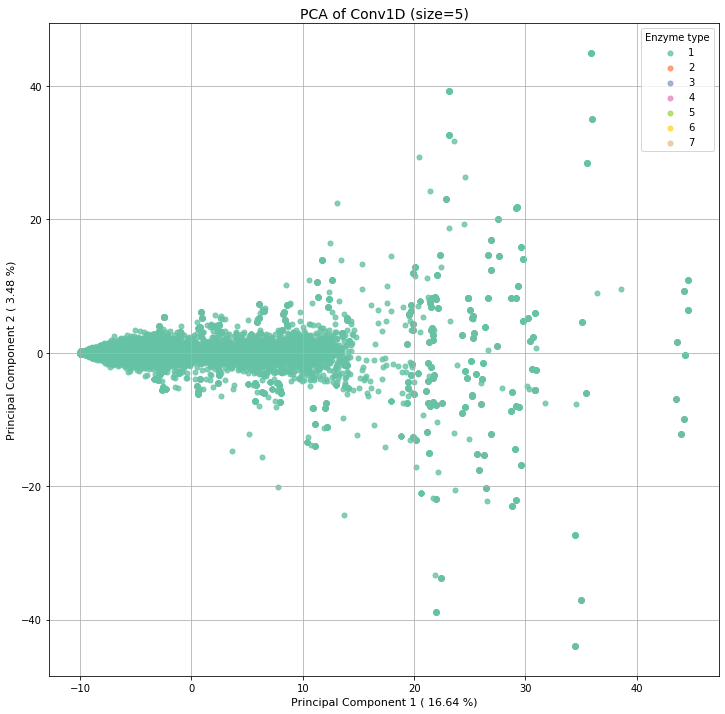

In [15]:
plot_pca(final_df_task1, pca_task1, "enzyme_type")
saving_activations_plot("plt", "2protsPerType_enzType", folder, task, p=None)

ext_padding (8960,)
mid_padding (8960,)
post_padding (8960,)
pre_padding (8960,)
rnd_padding (8960,)
strf_padding (8960,)
zoom_padding (8960,)


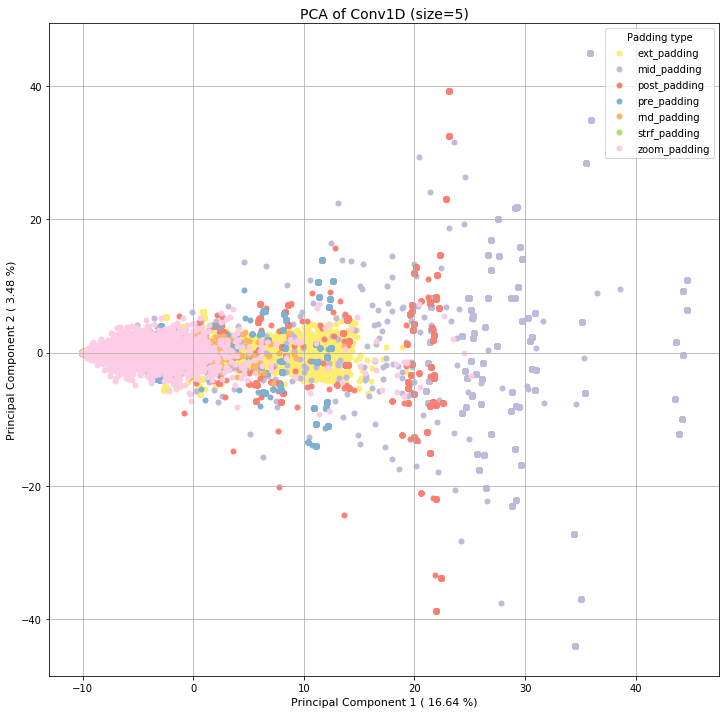

In [18]:
plot_pca(final_df_task1, pca_task1, "padding", list_paddings)
saving_activations_plot("plt", "2protsPerType_padding", folder, task, p=None)

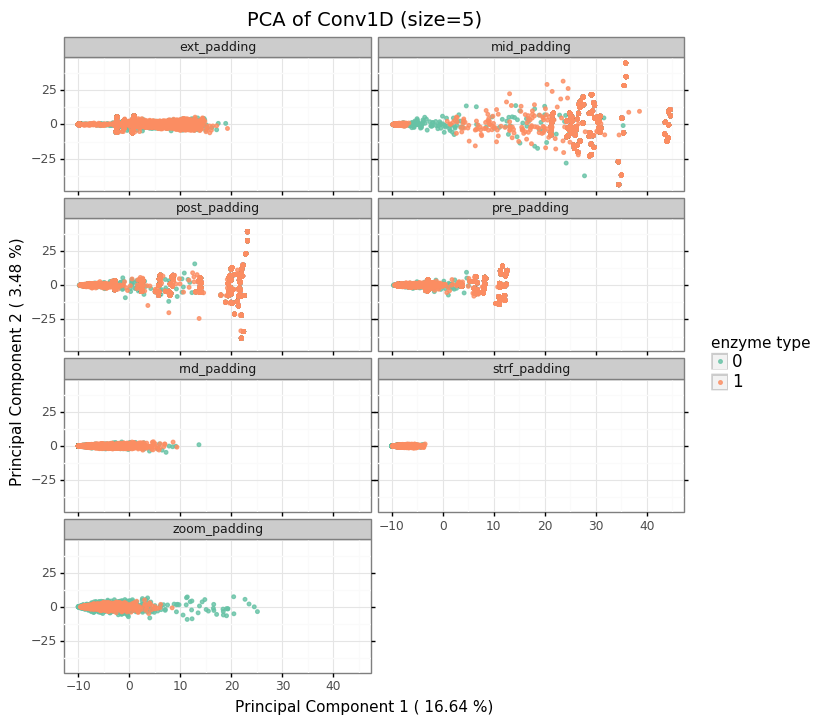

<ggplot: (-9223363294770184609)>

In [19]:
p = plot_pca_per_padding(final_df_task1, pca_task1)
saving_activations_plot("ggplot", "2protsPerType_facetPerPadding", folder, task, p=p)
p

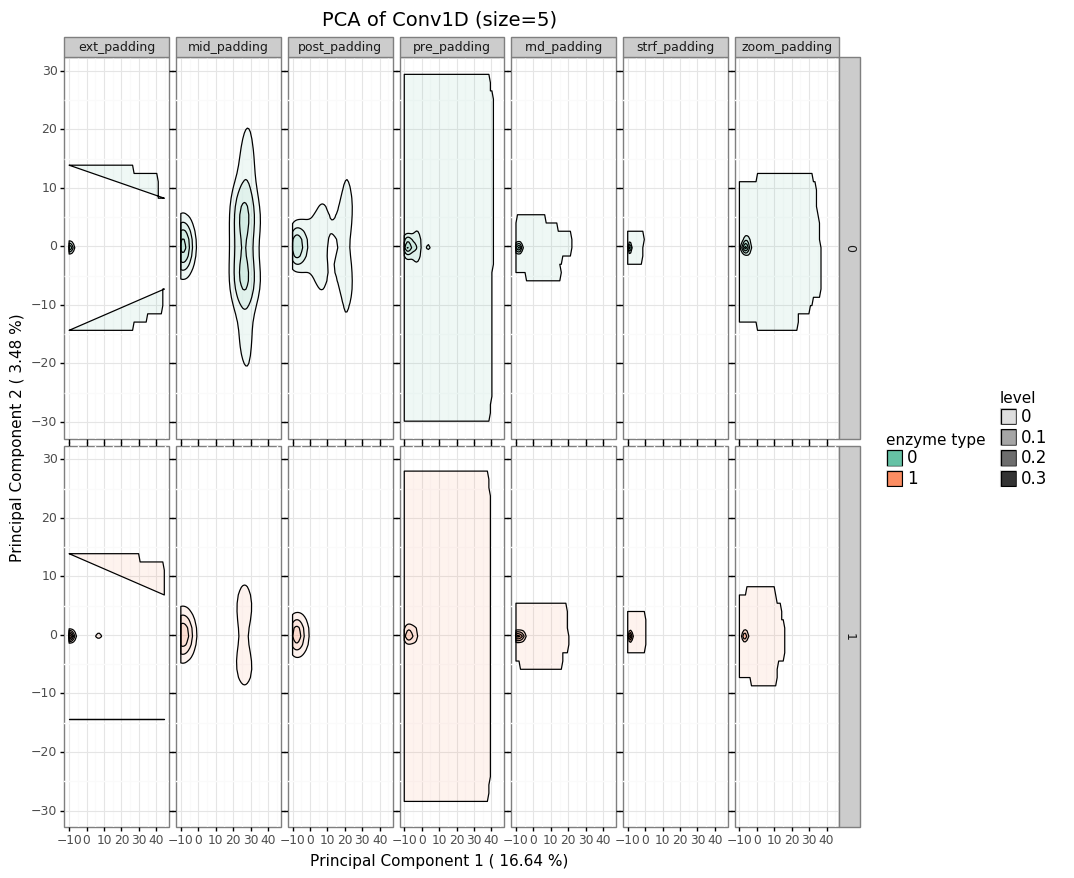

<ggplot: (-9223363294774905007)>

In [20]:
q = density_facet(final_df_task1, pca_task1)
saving_activations_plot("ggplot", "2protsPerType_densityFacet", folder, task, p=q)
q

# Task 2

In [5]:
task = 'task2/'

In [ ]:
#Define list of dataframes
lista_dfs = []
contador = 0
for tup in prots_pca_task2:
    model_type = tup[2]
    enz_type = tup[1]
    prot = tup[0]
    for fold in range(0,3):#range(nfolds):
        contador = contador + 1
        #print("Model type: ", model_type, "enzyme type", enz_type)
        model = search_model(folder, str(fold), task, model_type)
        #writing log file 
        log_file = ''.join(string for string in [absPath, 'data/results/', folder, task, 'log_file_pca.txt' ])
        f = open(log_file, 'a+')
        print('Iteracion número %s' % contador, file=f)
        print('Model type: %s \n' % model_type, file=f)
        print('Enzyme type: %s \n' % enz_type, file=f)
        formatted_time = datetime.datetime.now()
        print('Starting time: %s \n' % formatted_time, file=f)
        activations = obtain_activations(model, nlayer, prot)
        act_df = activations_to_df(activations, model_type, fold)
        act_df["enzyme_type"] = tup[1]
        formatted_endtime = datetime.datetime.now()
        print('Finishing time: %s \n' % formatted_endtime, file=f)
        lista_dfs.append(act_df)
        f.close()
        
# ha tardado un huevo en ejecutarse asi que deberia guardarlo
filename = "activations_enzymeType_pt1.pickle"
pickle_path = "".join((absPath, "data/results/", folder, task, filename))
with open(pickle_path, 'wb') as handle:
    pickle.dump(lista_dfs, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [10]:
# ha tardado un huevo en ejecutarse asi que deberia guardarlo
filename = "activations_enzymeType_pt1.pickle"
pickle_path = "".join((absPath, "data/results/", folder, task, filename))
#with open(pickle_path, 'wb') as handle:
#    pickle.dump(lista_dfs, handle, protocol=pickle.HIGHEST_PROTOCOL)

#loading it
with open(pickle_path, 'rb') as handle:
    lista_dfs_task2_1 = pickle.load(handle)

In [ ]:
#Define list of dataframes
lista_dfs = []
contador = 0
for tup in prots_pca_task2:
    model_type = tup[2]
    enz_type = tup[1]
    prot = tup[0]
    for fold in range(3,6):#range(nfolds):
        contador = contador + 1
        #print("Model type: ", model_type, "enzyme type", enz_type)
        model = search_model(folder, str(fold), task, model_type)
        #writing log file 
        log_file = ''.join(string for string in [absPath, 'data/results/', folder, task, 'log_file_pca.txt' ])
        f = open(log_file, 'a+')
        print('Iteracion número %s' % contador, file=f)
        print('Model type: %s \n' % model_type, file=f)
        print('Enzyme type: %s \n' % enz_type, file=f)
        formatted_time = datetime.datetime.now()
        print('Starting time: %s \n' % formatted_time, file=f)
        activations = obtain_activations(model, nlayer, prot)
        act_df = activations_to_df(activations, model_type, fold)
        act_df["enzyme_type"] = tup[1]
        formatted_endtime = datetime.datetime.now()
        print('Finishing time: %s \n' % formatted_endtime, file=f)
        lista_dfs.append(act_df)
        f.close()
        
# ha tardado un huevo en ejecutarse asi que deberia guardarlo
filename = "activations_enzymeType_pt2.pickle"
pickle_path = "".join((absPath, "data/results/", folder, task, filename))
with open(pickle_path, 'wb') as handle:
    pickle.dump(lista_dfs, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [11]:
# ha tardado un huevo en ejecutarse asi que deberia guardarlo
filename = "activations_enzymeType_pt2.pickle"
pickle_path = "".join((absPath, "data/results/", folder, task, filename))
#with open(pickle_path, 'wb') as handle:
#    pickle.dump(lista_dfs, handle, protocol=pickle.HIGHEST_PROTOCOL)

#loading it
with open(pickle_path, 'rb') as handle:
    lista_dfs_task2_2 = pickle.load(handle)

In [ ]:
#Define list of dataframes
lista_dfs = []
contador = 0
for tup in prots_pca_task2:
    model_type = tup[2]
    enz_type = tup[1]
    prot = tup[0]
    for fold in range(6,10):#range(nfolds):
        contador = contador + 1
        #print("Model type: ", model_type, "enzyme type", enz_type)
        model = search_model(folder, str(fold), task, model_type)
        #writing log file 
        log_file = ''.join(string for string in [absPath, 'data/results/', folder, task, 'log_file_pca.txt' ])
        f = open(log_file, 'a+')
        print('Iteracion número %s' % contador, file=f)
        print('Model type: %s \n' % model_type, file=f)
        print('Enzyme type: %s \n' % enz_type, file=f)
        formatted_time = datetime.datetime.now()
        print('Starting time: %s \n' % formatted_time, file=f)
        activations = obtain_activations(model, nlayer, prot)
        act_df = activations_to_df(activations, model_type, fold)
        act_df["enzyme_type"] = tup[1]
        formatted_endtime = datetime.datetime.now()
        print('Finishing time: %s \n' % formatted_endtime, file=f)
        lista_dfs.append(act_df)
        f.close()
        
# ha tardado un huevo en ejecutarse asi que deberia guardarlo
filename = "activations_enzymeType_pt3.pickle"
pickle_path = "".join((absPath, "data/results/", folder, task, filename))
with open(pickle_path, 'wb') as handle:
    pickle.dump(lista_dfs, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [12]:
# ha tardado un huevo en ejecutarse asi que deberia guardarlo
filename = "activations_enzymeType_pt3.pickle"
pickle_path = "".join((absPath, "data/results/", folder, task, filename))


#loading it
with open(pickle_path, 'rb') as handle:
    lista_dfs_task2_3 = pickle.load(handle)

In [13]:
lista_dfs_task2 = lista_dfs_task2_1 + lista_dfs_task2_2 + lista_dfs_task2_3

In [14]:
final_df_task2, pca_task2 = train_pca(lista_dfs_task2, 2)

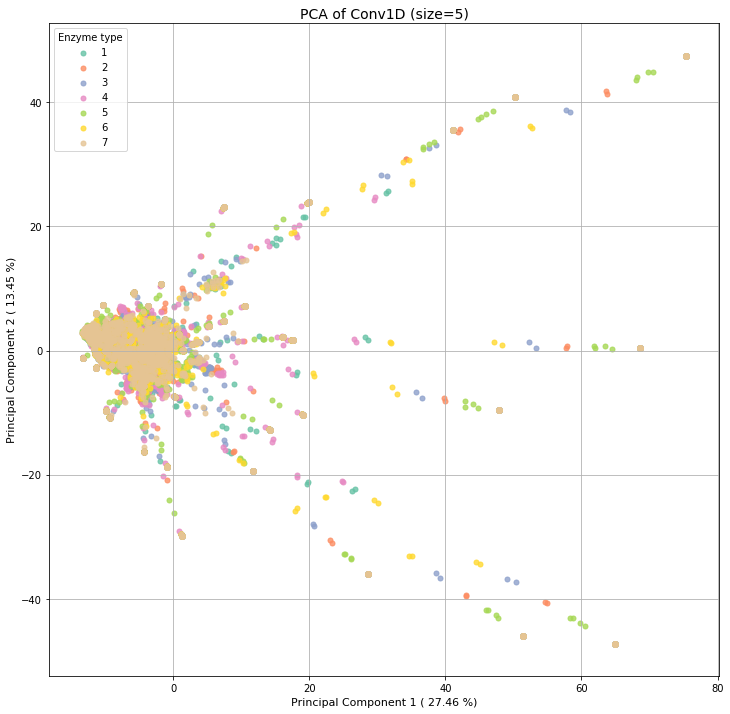

In [15]:
plot_pca(final_df_task2, pca_task2, "enzyme_type")
saving_activations_plot("plt", "2protsPerType_enzType", folder, task, p=None)

ext_padding (1400,)
mid_padding (1400,)
post_padding (1400,)
pre_padding (1400,)
rnd_padding (1400,)
strf_padding (1400,)
zoom_padding (1400,)


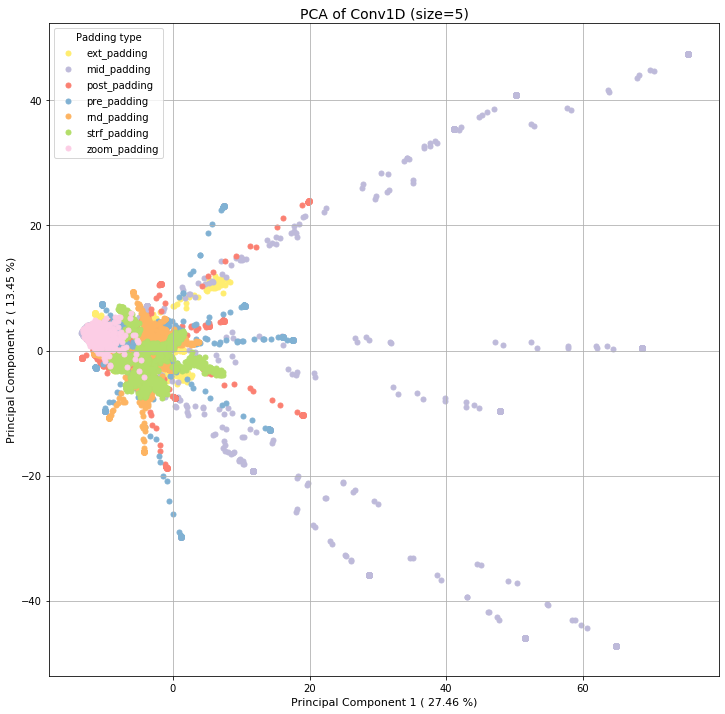

In [17]:
plot_pca(final_df_task2, pca_task2, "padding", list_paddings)
saving_activations_plot("plt", "2protsPerType_padding", folder, task, p=None)

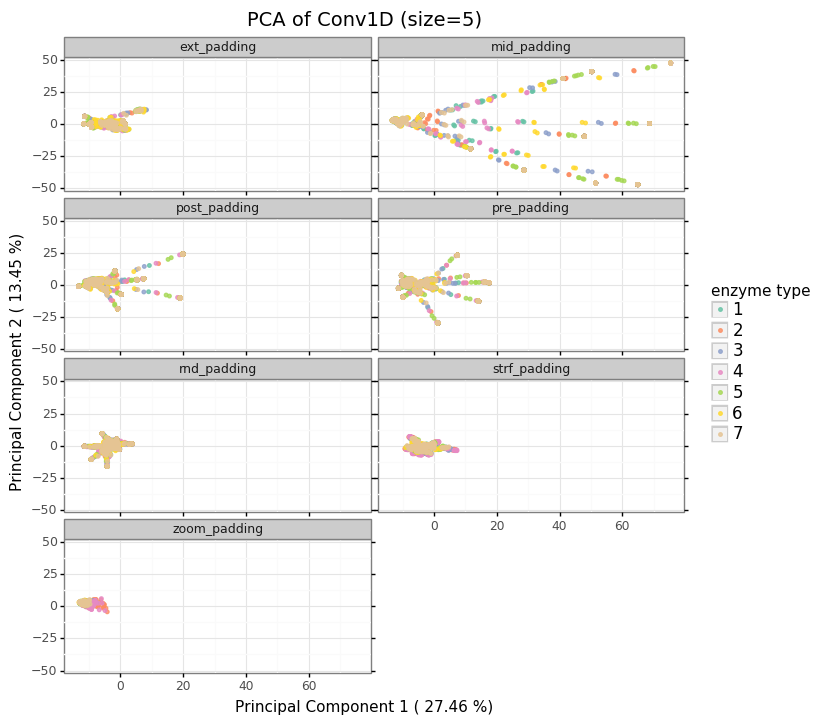

<ggplot: (-9223363282435917182)>

In [18]:
p = plot_pca_per_padding(final_df_task2, pca_task2)
saving_activations_plot("ggplot", "2protsPerType_facetPerPadding", folder, task, p=p)
p

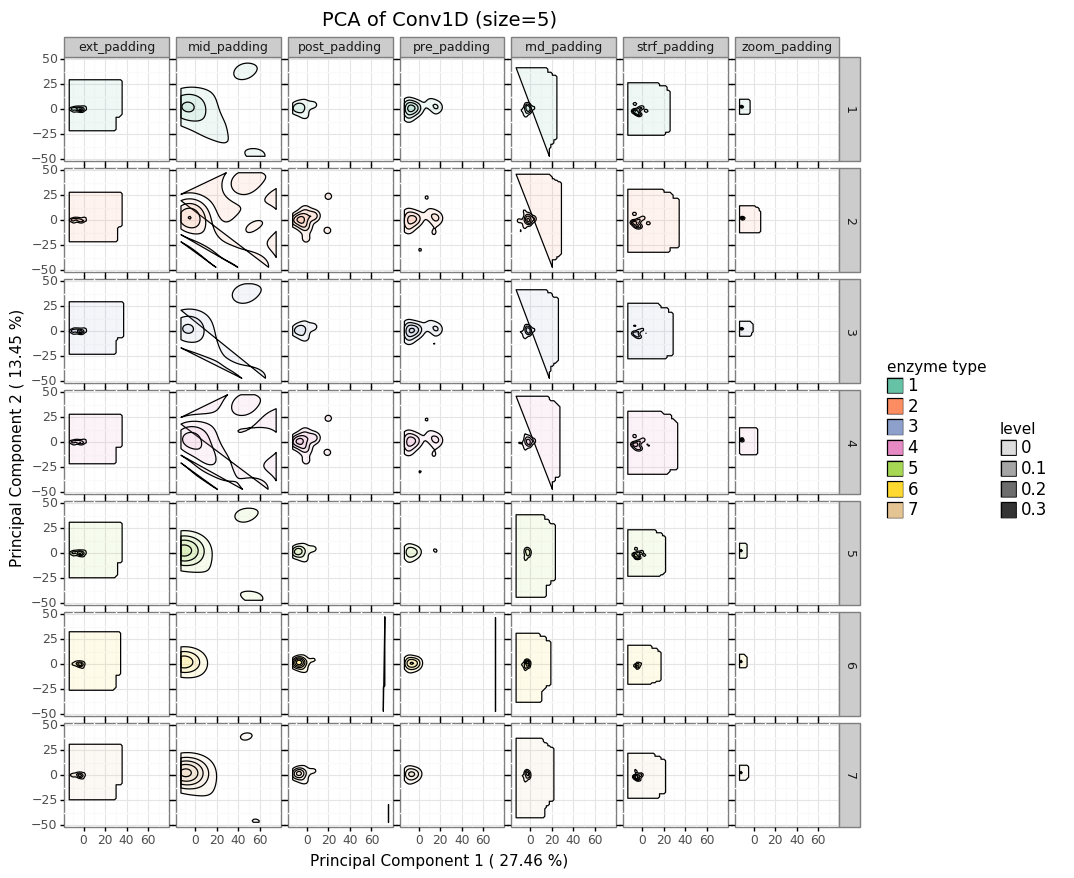

<ggplot: (8754416256292)>

In [19]:
q = density_facet(final_df_task2, pca_task2)
saving_activations_plot("ggplot", "2protsPerType_densityFacet", folder, task, p=q)
q

In [ ]:
#GUARDAR EN CSV PC1